In [1]:
# TAREAS DE LOS MÓDULOS DE CNN Y RNN - MIAX9
# Para cada uno de los siguientes ejercicios entregar un fichero en ipython notebook  (.ipynb).
# En cada fichero tenéis que solucionar un ejercicio distinto, es importante que comentéis la
# solución que habéis realizado y los resultados obtenidos.
# El código ha de ser compilable desde Google Colab (utilizando el entorno de Colab), y no
# ha de contener errores. En los casos en los que se pide entrenar un modelo razona sobre
# la evolución del error de entrenamiento y de validación durante el entrenamiento.
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de
# Instituto BME.

In [2]:
# 2.- Entrena un modelo en Keras que tenga al menos tres capas convolucionales pero NO
# capas densas, además usa regularización, y los callbacks de early stopping y
# ReduceLROnPlateau para resolver el problema de clasificación con los datos CIFAR100
# que están en Keras. Comprueba que el proceso de entrenamiento ha convergido mostrando
# las curvas de entrenamiento para entrenamiento y para validación. Da los valores de error
# de Test.
# Compara los tiempos de entrenamiento y predicción con y sin GPU (usando tu GPU o la de
# Colab) con el modelo del ejercicio anterior.

In [3]:


# CNN_cifar100_tf2_clase densa
# CNN_cifar100_tf2
# CNN_cifar100_separable
# ConvAE_metrica_perceptual_NLPD_jugar

2.9.2
169001437/169001437 [==============================] - 5s 0us/step
(50000, 32, 32, 3)


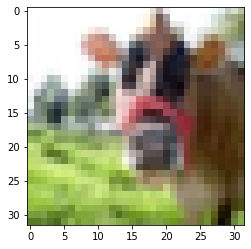

In [4]:
#Bajar datos y prepararlos como en CNN_cifar100_tf2
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()
#DEBO NORMALIZAR LOS X_train Y X_test DE -1 A 1 PQ SER QUE LOS VALORES VAN DE 0 A 255
X_train = X_train/255
X_test = X_test/255
 # Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)
import matplotlib.pyplot as plt
# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")
 # one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 100), (10000, 32, 32, 3), (10000, 100))

In [6]:
#Si tomo como ejemplo de los apuntes CNN_cifar100_tf2_clase; tomo el modelo siguiente;
# elimino la capa final densa; pero pongo en la tercera capa Conv2D 100 neuronas
# y se hace luego el flatten; me sale (None, 100)

# este ejemplo tiene:
# 1.- 3 capas convolucionales
# 2.- Ninguan capa densa
# 3.- regulariza / de dejado Dropouts y listo para usar L1s
# 4.- Tiene EarlyStopping y ReduceLROnPlateau
# 5. - como vimos en el ejercicio 1; siendo X_train.shape (50000, 32, 32, 3); 
# el mayor numero de parametros deberia ser 50000* 0.1 = 5000
# asi que no hay problema para el numero de parametros. En este ejemplo tengo
# Trainable params: 139,364
# 6.- Abajo aparece las curvas de entrenamiento para entrenamiento que se ve que convergen
# 7.- Abajo aparece las curvas para validación; que entiendo que son las de test; aunque el enunciado puede llevar a error.
# En la ultima funcion ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR; entiendo qeu se realiza la parte del enunciado 
# "Dar los datos d error de TEST".
# 8.- Este modelo tiene mas cosas pero creo qeu cubre lo que se pide en el ejercicio
# 9.- en la capa de salida, antes del flatten; uso softmax

# Hacemos un modelo con varias capas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D
from tensorflow.keras import regularizers

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil



#crear modelo
model = Sequential()
#Vamos añadiendo capas
model.add(Conv2D(4, kernel_size=3, activation='relu', input_shape=(32,32,3)))
#                activity_regularizer=regularizers.l1(0.2)))
# model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Conv2D(4, kernel_size=5, activation='relu'))
#                activity_regularizer=regularizers.l1(0.2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Conv2D(100, kernel_size=3, activation='softmax')) 
# con softmax las salidas de la red son todas positivas  y suman 1 siendo la salida de la red  para clasificacion multiclase como es este el caso
# antes tenia relu; que es a que se usa para las capas ocultas
# pues si le pongo aqui 100 y el flattem le da salida 100; que me vale para las categorical salidas.
# me da salida (None, 100)
#                activity_regularizer=regularizers.l1(0.2)))
model.add(MaxPooling2D())
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Flatten())
#model.add(Dense(100, activation='softmax'))
# Compilamos el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Este es el modelo
model.summary()

# Vamos a usar el callback de earlystopping y ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.01)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.1)

# Entrenamos
epochs = 50
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, callbacks=[early_stopping,reduce_lr])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 4)         112       
                                                                 
 dropout (Dropout)           (None, 30, 30, 4)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 4)         404       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 100)         3

313/313 [==============================] - 3s 8ms/step - loss: 3.7574 - accuracy: 0.1332
[3.757448434829712, 0.133200004696846]


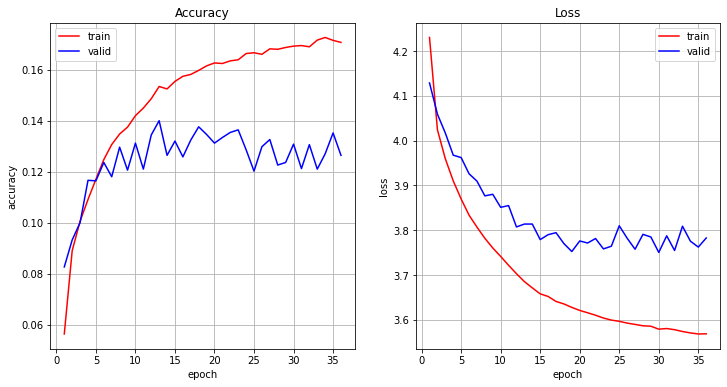

In [7]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
print(score)

n_epochs = len(hist.history['loss'])
hd = hist.history
epochs = range(1, n_epochs+1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, hd['accuracy'], "r", label="train")
plt.plot(epochs, hd['val_accuracy'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hd['loss'], "r", label="train")
plt.plot(epochs, hd['val_loss'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss")
plt.legend()
plt.show()

In [8]:
print('Analizo los resultado en TEST')
print('el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen los datos en si:')
from keras.losses import mse
print(mse(X_test,X_test.mean(axis=0)).numpy().mean())

print('Que tiene un error medio de las salidas de:')
print(np.mean(np.abs(y_test)))
print('esto no tiene sentido mirarlo en este problema pq son hasta 100 etiquetas.')

print('Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta dada de antemano de salida:')
a = np.mean(abs(model.predict(X_test)-y_test))
print(f'{a}')

print('Entiendo que este modelo mejora el error que tienen los datos explicitamente en TEST  ya que ')
print(f'{a}')
print('es menos que')
print(mse(X_test,X_test.mean(axis=0)).numpy().mean())

print('Analizo los resultado en TRAIN')
print('el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen losdatos en si:')
print(mse(X_train,X_train.mean(axis=0)).numpy().mean())

print('que tiene un error medio d elas salidas de:')
print(np.mean(np.abs(y_train)))
print('esto no tiene sentido mirarloen este problema pq son hasta 100 etiquetas.')

print('Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta dada de antemano de salida:')
b = np.mean(abs(model.predict(X_train)-y_train))
print(f'{b}')

print('Entiendo que este modelo mejora el error que tienen los datos explicitamente en TRAIN  ya que ')
print(np.mean(abs(model.predict(X_train)-y_train)))
print('es menos que')
print(f'{b}')

#x_train=X_train, x_test=X_test, t_train=y_train, t_test=y_test

Analizo los resultado en TEST
el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen los datos en si:
0.07044800075712608
Que tiene un error medio de las salidas de:
0.01
esto no tiene sentido mirarlo en este problema pq son hasta 100 etiquetas.
Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta dada de antemano de salida:
313/313 [==============================] - 2s 8ms/step
0.02440737746655941
Entiendo que este modelo mejora el error que tienen los datos explicitamente en TEST  ya que 
0.02440737746655941
es menos que
0.07044800075712608
Analizo los resultado en TRAIN
el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen losdatos en si:
0.06998966549510376
que tiene un error medio d elas salidas de:
0.01
esto no tiene sentido mirarloen este problema pq son hasta 100 etiquetas.
Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta d

In [9]:
# ME DA VALORES PEORES QUE LAS REDES QUE VIMOS EN CLASE QUE TERMINAN EN UNA CAPA DENSA.
# PERO CREO QUE LA CELDA ANTERIOR DA Y ANALIZA LOS ERRORES DE TEST Y TRAIN. CUMPLE CON ESA PARTE DEL ENUNCIADO
# CREO QUE SE CONTESTA ESTE PROBLEMA AUNQUE ESTO SE PODRIA ANALIZAR Y HACER MODELS MAS COMPLEJOS, ETC

In [10]:
# HASTA AQUI ANALIZADO EN COLAB CON CPU

In [11]:
# A PARTIR DE AQUI ENTRENADO EN COLAB CON GPU PARA VER QUE VA MAS RAPIDO

2.9.2
169001437/169001437 [==============================] - 3s 0us/step
(50000, 32, 32, 3)


((50000, 32, 32, 3), (50000, 100), (10000, 32, 32, 3), (10000, 100))

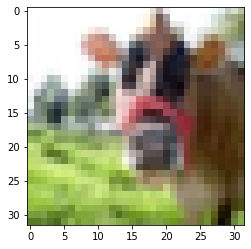

In [2]:
#Bajar datos y prepararlos como en CNN_cifar100_tf2
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()
#DEBO NORMALIZAR LOS X_train Y X_test DE -1 A 1 PQ SER QUE LOS VALORES VAN DE 0 A 255
X_train = X_train/255
X_test = X_test/255
 # Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)
import matplotlib.pyplot as plt
# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")
 # one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [3]:
# Hacemos un modelo con varias capas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D
from tensorflow.keras import regularizers

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil

#crear modelo
model = Sequential()
#Vamos añadiendo capas
model.add(Conv2D(4, kernel_size=3, activation='relu', input_shape=(32,32,3)))
#                activity_regularizer=regularizers.l1(0.2)))
# model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Conv2D(4, kernel_size=5, activation='relu'))
#                activity_regularizer=regularizers.l1(0.2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Conv2D(100, kernel_size=3, activation='softmax')) 
# con softmax las salidas d ela red son todas positivas  y suman 1 siendo la salida de la red  para clasificacion multiclase como es este el caso
# antes tenia relu; que es a que se usa para las capas ocultas
# pues si le pongo aqui 100 y el flatem le da salida 100; que me vale para las categorical salidas.
# me da salida (None, 100)
#                activity_regularizer=regularizers.l1(0.2)))
model.add(MaxPooling2D())
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Flatten())
#model.add(Dense(100, activation='softmax'))
# Compilamos el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Este es el modelo
model.summary()

# Vamos a usar el callback de earlystopping y ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.01)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.1)

# Entrenamos
epochs = 50
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, callbacks=[early_stopping,reduce_lr])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 4)         112       
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 4)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 4)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 4)         404       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 100)        

313/313 [==============================] - 2s 8ms/step - loss: 3.7562 - accuracy: 0.1519
[3.7562012672424316, 0.15189999341964722]


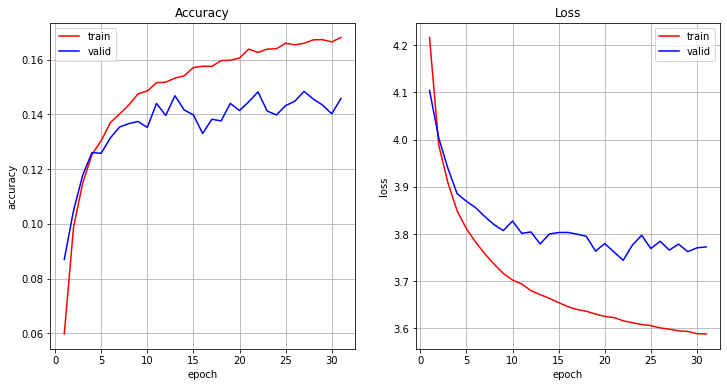

In [4]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
print(score)

n_epochs = len(hist.history['loss'])
hd = hist.history
epochs = range(1, n_epochs+1)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, hd['accuracy'], "r", label="train")
plt.plot(epochs, hd['val_accuracy'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hd['loss'], "r", label="train")
plt.plot(epochs, hd['val_loss'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss")
plt.legend()
plt.show()

In [5]:
print('Analizo los resultado en TEST')
print('el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen los datos en si:')
from keras.losses import mse
print(mse(X_test,X_test.mean(axis=0)).numpy().mean())

print('Que tiene un error medio de las salidas de:')
print(np.mean(np.abs(y_test)))
print('esto no tiene sentido mirarlo en este problema pq son hasta 100 etiquetas.')

print('Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta dada de antemano de salida:')
a = np.mean(abs(model.predict(X_test)-y_test))
print(f'{a}')

print('Entiendo que este modelo mejora el error que tienen los datos explicitamente en TEST  ya que ')
print(f'{a}')
print('es menos que')
print(mse(X_test,X_test.mean(axis=0)).numpy().mean())

print('Analizo los resultado en TRAIN')
print('el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen losdatos en si:')
print(mse(X_train,X_train.mean(axis=0)).numpy().mean())

print('que tiene un error medio d elas salidas de:')
print(np.mean(np.abs(y_train)))
print('esto no tiene sentido mirarloen este problema pq son hasta 100 etiquetas.')

print('Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta dada de antemano de salida:')
b = np.mean(abs(model.predict(X_train)-y_train))
print(f'{b}')

print('Entiendo que este modelo mejora el error que tienen los datos explicitamente en TRAIN  ya que ')
print(np.mean(abs(model.predict(X_train)-y_train)))
print('es menos que')
print(f'{b}')

#x_train=X_train, x_test=X_test, t_train=y_train, t_test=y_test

Analizo los resultado en TEST
el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen los datos en si:
0.07044800075712608
Que tiene un error medio de las salidas de:
0.01
esto no tiene sentido mirarlo en este problema pq son hasta 100 etiquetas.
Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta dada de antemano de salida:
313/313 [==============================] - 2s 8ms/step
0.024425432085990906
Entiendo que este modelo mejora el error que tienen los datos explicitamente en TEST  ya que 
0.024425432085990906
es menos que
0.07044800075712608
Analizo los resultado en TRAIN
el modelo mas tonto es compararlo con la media de los valores de entrada; ver el error que tienen losdatos en si:
0.06998966549510376
que tiene un error medio d elas salidas de:
0.01
esto no tiene sentido mirarloen este problema pq son hasta 100 etiquetas.
Y aqui me sale el valor de la media de la diferencia entre lo predecido y la etiqueta

In [ ]:
#CONCLUSION, EN CPU DE COLAG TARDE CADA EPOCA  CASI 30 SEGUNDOS, CUANDO EN LA GPU DE COLAB TARDA 6 SEGUNDOS